In [2]:
#Mount drive

import os, sys

class FileSystem:
  def __init__(self, colab_dir="PersonTracking/MirkosREIDPlayground", local_dir="./", data_dir="data"): # replace with dlav path
    IN_COLAB = 'google.colab' in sys.modules
    if (IN_COLAB):
      from google.colab import drive
      drive.mount('/gdrive')
      self.root_dir = os.path.join("/gdrive/My Drive/", colab_dir)
    else:
      self.root_dir = local_dir
    self.data_dir = data_dir
    self.change_directory = False

  def data_path(self, name):
    return os.path.join(self.data_dir, name) if self.change_directory else os.path.join(self.root_dir, self.data_dir, name)

  def path(self, name):
    return os.path.join("./", name) if self.change_directory else os.path.join("./", self.root_dir, name)

  def cd(self):
    %cd {self.root_dir}
    %ls
    self.change_directory = True

fs = FileSystem()
fs.cd()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/PersonTracking/MirkosREIDPlayground
Gallery/  Query/  REIDPlayground.ipynb  reid-strong-baseline/


In [3]:
import torch 
import numpy as np
from tqdm import tqdm 

import io
import PIL
import requests
import cv2
import os
import shutil
import matplotlib.pyplot as plt

try:
  shutil.rmtree('reid-strong-baseline')
except OSError as e: 
  pass

!git clone https://github.com/nodiz/reid-strong-baseline.git
!ls


Cloning into 'reid-strong-baseline'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 603 (delta 6), reused 17 (delta 4), pack-reused 580
Receiving objects: 100% (603/603), 4.76 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (307/307), done.
Gallery  Query	REIDPlayground.ipynb  reid-strong-baseline


Query Image

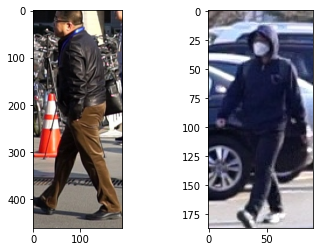

In [0]:
fig = plt.figure()

for querynr in range(len(os.listdir('Query'))):
  img = cv2.imread('Query/'+str(querynr)+'.jpg') 
  RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #axs[galnr]=plt.imshow(RGB_img)
  ax = fig.add_subplot(1, len(os.listdir('Query')), querynr+1)
  ax.imshow(RGB_img)



Gallery Images

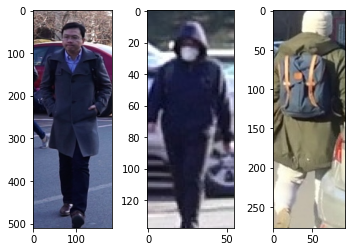

In [0]:
fig = plt.figure()

for galnr in range(len(os.listdir('Gallery'))):
  img = cv2.imread('Gallery/'+f'{galnr:04}'+'/0.jpg') 
  RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #axs[galnr]=plt.imshow(RGB_img)
  ax = fig.add_subplot(1, len(os.listdir('Gallery')), galnr+1)
  ax.imshow(RGB_img)
  

In [59]:
import shutil
import os
import os.path
import glob
import scipy as sp


def crop_affilition(distmat,dist_thld,framenr):
    #For distmat: rows: Querys, Collums: Gallery
    
    

    sort_distmat=distmat[np.sort(distmat)[:,0].argsort()]
    order=np.sort(distmat)[:,0].argsort()
    

    maxiter=np.shape(distmat)[0]
    gallength=len(os.listdir('Gallery'))
    label_list=[]
    querynr=0
    i=0

    while querynr < maxiter and i<10:
      i+=1

      origin=order[0]
  
      
    
      min_dist=np.sort(sort_distmat)[:,0]


      gimg=np.argsort(sort_distmat)



      #find elements p
      prediction= np.argsort(sort_distmat)[:,0]


      if min_dist[0]<dist_thld and querynr<=gallength:
        #put query to corresponding gallery

        label=prediction[0]
        
        
        if label in label_list:
          #check if label was already assigned, if yes set distance to infty

          distmat[:,gimg[querynr,0]]=float("inf")
       
          sort_distmat=distmat[np.sort(distmat)[:,0].argsort()]

          order=np.sort(distmat)[:,0].argsort()
          origin=order[querynr]
          
          
        else:

          label_list=np.append(label_list,label)
          #shutil.move('Query/'+str(origin)+'.jpg', 'Gallery/'+f'{label:04}'+'/'+str(framenr)+'.jpg' )

          print('Put Query '+str(origin)+' into Gallery ' +f'{label:04}')

          sort_distmat=distmat[np.sort(distmat)[:,0].argsort()]
          order=np.sort(distmat)[:,0].argsort()
          print('order',order)
          querynr+=1
      
      else:
        #put remaining queries in new folder
        os.makedirs('Gallery/'+f'{gallength:04}', exist_ok=True)
        shutil.move('Query/'+str(origin)+'.jpg', 'Gallery/'+f'{gallength:04}'+'/'+str(framenr)+'.jpg' )
        gallength+=1
        print('Put Query '+str(origin)+' into new Gallery ' +f'{gallength:04}')
        querynr+=1

framenr=1
dist_thld=0.03
distmat=np.array([[0.027,0.01,0.05],[0.04,0.4,0.05],[0.05,0.02,0.9]])
crop_affilition(distmat,dist_thld,framenr)

Put Query 0 into Gallery 0001
order [0 2 1]
Put Query 0 into Gallery 0000
order [0 1 2]
Put Query 0 into new Gallery 0004
